In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

import repository as repo

In [2]:
base_repo = "https://api.github.com/users/{user}/repos" 

In [3]:
columns = [
 'name',
 'fork',
 'created_at',
 'updated_at',
 'pushed_at',
 'size',
 'stargazers_count',
 'watchers_count',
 'language',
 'has_issues',
 'has_projects',
 'has_downloads',
 'has_wiki',
 'has_pages',
 'forks_count',
 'archived',
 'disabled',
 'open_issues_count',
 'forks',
 'open_issues',
 'watchers',
 'default_branch'
]

In [4]:
user = "mspdl"
#user = "eliardo"

#url_repo = base_repo.replace("{user}", user)

# Repositories

In [5]:
#repos = requests.get(url_repo)

In [6]:
#df = pd.DataFrame(repos.json(), columns=columns)

#df['created_at'] = pd.to_datetime(df['created_at'])
#df['updated_at'] = pd.to_datetime(df['updated_at'])
#df['pushed_at'] = pd.to_datetime(df['pushed_at'])

df = repo.getRepos(user)

## Languages

In [7]:
#df['year'] = pd.DatetimeIndex(df['created_at']).year
#languages = df[["language", "year"]]
#lg = df.groupby(["language", "year"])["language"].count().reset_index(name="count")

In [8]:
#df1 = lg.pivot(index='year', columns='language', values='count')

In [9]:
#df1 = df1.fillna(0)
#df1

df1 = repo.creationFromYear(df)

<AxesSubplot:title={'center':'Criação de Repositórios por Linguagem e por Ano'}, xlabel='year'>

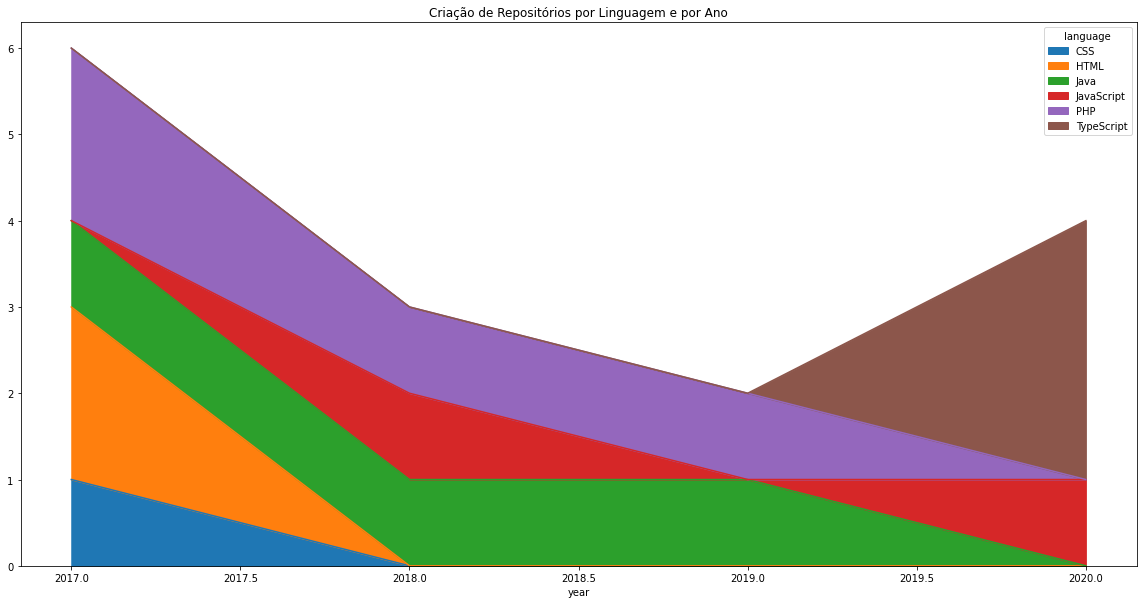

In [10]:
df1.plot(kind="area", figsize=(20,10), title="Criação de Repositórios por Linguagem e por Ano")

## Quantidade de Código

In [11]:
languages = df[["language", "year", "size"]]
lg1 = languages.groupby(["language", "year"])["size"].sum().reset_index(name="size")

df2 = lg1.pivot(index='year', columns='language', values='size')
df2 = df2.fillna(0)

df2

language,CSS,HTML,Java,JavaScript,PHP,TypeScript
year,,,,,,
2017,3755.0,1334.0,1227.0,0.0,10509.0,0.0
2018,0.0,0.0,815.0,18118.0,250.0,0.0
2019,0.0,0.0,62.0,0.0,17.0,0.0
2020,0.0,0.0,0.0,348.0,0.0,2482.0


<AxesSubplot:title={'center':'Criação de Código por Linguagem por Ano'}, xlabel='year'>

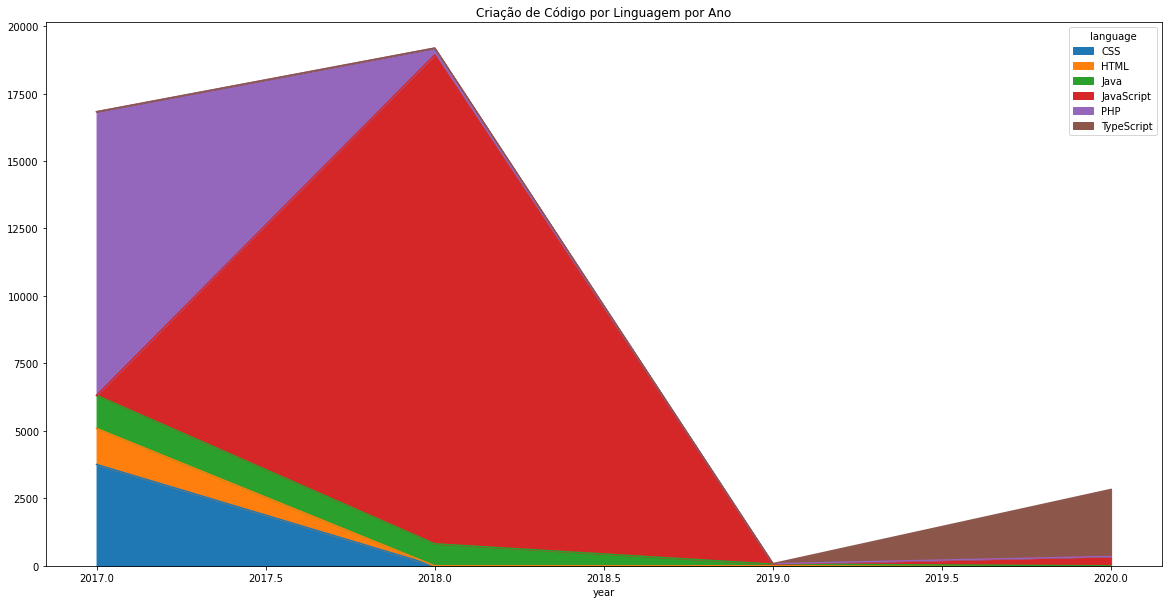

In [12]:
df2.plot(kind="area", figsize=(20,10), title="Criação de Código por Linguagem por Ano")